#CNN on CIFAR10 dataset

https://www.tensorflow.org/tutorials/images/cnn

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##Download and load data as training and testing set

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

print('train images shape:', train_images.shape, "test images shape:", test_images.shape)

170500096/170498071 [==============================] - 4s 0us/step
train images shape: (50000, 32, 32, 3) test images shape: (10000, 32, 32, 3)


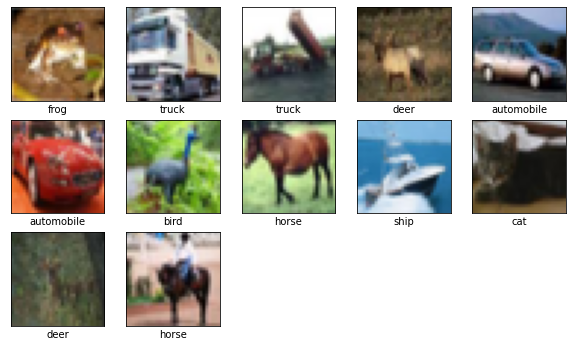

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

example_number = 12
plt.figure( figsize=(10,10) )
for i in range(example_number):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( train_images[i], cmap= plt.cm.binary  )
    plt.xlabel( class_names[ train_labels[i][0] ] )  # CIFAR10 labels are arrayes, so we need to access 2d array
plt.show()

##Convolutional base arcitechture 

In [14]:
cnn = models.Sequential()

## 1st layer
#( layers.Conv2D( num_Of_Filters, (filter_shape), ... , imput_shape= (image_height, image_width, color_channels) ) )
cnn.add( layers.Conv2D( 32, (3, 3), activation='relu', input_shape=(32, 32, 3) ) )
#output (30*30) *32
# MaxPool2D( (filter_shape)
cnn.add( layers.MaxPool2D( (2,2) ) )
#output (15*15) *32

##2nd layer
# no need to add inputshape here
cnn.add( layers.Conv2D( 64, (3,3), activation='relu' ) )
cnn.add( layers.MaxPool2D( (2,2) ) )
cnn.add( layers.Conv2D( 64, (3,3), activation='relu' ) )

# show the model architecture summary
# cnn.summary()

##Flatten output to 1D

In [15]:
cnn.add( layers.Flatten() )
# cnn.summary()

##Add Dense and output layer

In [16]:
cnn.add( layers.Dense( 64, activation='relu' ) )
#final output layer (10 node since CIFAR10 has 10 classes), we will get 10 probabilstic output for each image input
cnn.add( layers.Dense( 10 ) )

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

##Compile + Train the CNN model

In [17]:
cnn.compile( optimizer='adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
            metrics=['accuracy'] )

training_history = cnn.fit( train_images, train_labels, epochs=10, 
                           validation_data = (test_images, test_labels),
                           shuffle = True )

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5174 - accuracy: 0.4445 - val_loss: 1.2188 - val_accuracy: 0.5642
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1445 - accuracy: 0.5939 - val_loss: 1.1063 - val_accuracy: 0.6041
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9986 - accuracy: 0.6493 - val_loss: 0.9833 - val_accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9016 - accuracy: 0.6847 - val_loss: 0.9487 - val_accuracy: 0.6678
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8256 - accuracy: 0.7111 - val_loss: 0.8681 - val_accuracy: 0.6968
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7673 - accuracy: 0.7305 - val_loss: 0.9000 - val_accuracy: 0.6857
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7192 - accuracy: 0.7497 - val_loss: 0.8680 - val_accuracy:

##Evaluate the model using plot

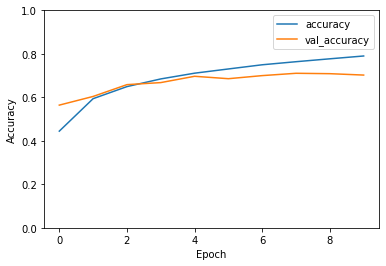

313/313 [==============================] - 1s 2ms/step - loss: 0.8902 - accuracy: 0.7024
test accuracy 0.7024000287055969


In [19]:
plt.plot( training_history.history['accuracy'], label='accuracy' )
plt.plot( training_history.history['val_accuracy'], label='val_accuracy' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.ylim( [0, 1] )
plt.legend(  )

plt.show()


test_loss, test_accu = cnn.evaluate( test_images, test_labels, verbose=1 )
print('test accuracy',test_accu)